In [1]:
# import libraries
import rasterio
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

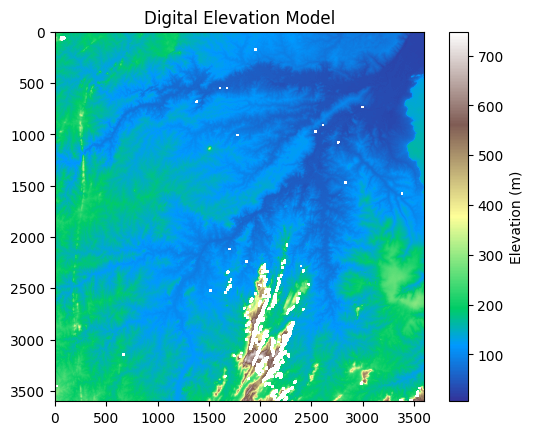

In [69]:
with rasterio.open("s06_w039_1arc_v3.tif") as src:
    dem = src.read(1)
    profile = src.profile
    nodata = src.nodata
    transform = src.transform
    crs = src.crs

# mask no data values
no_data_value = -32767
dem_masked = np.ma.masked_equal(dem, no_data_value)

# plot using only pixel coordinates
plt.imshow(dem_masked, cmap='terrain')
plt.title("Digital Elevation Model")
plt.colorbar(label="Elevation (m)")
plt.show()

In [58]:
dem_masked.max()

748

In [63]:
def load_dem(path):
    with rasterio.open(path) as src:
        dem = src.read(1)
        transform = src.transform
        nodata = src.nodata

        if nodata is not None:
            # Mask no-data values
            dem = np.ma.masked_equal(dem, nodata)

        return dem, transform

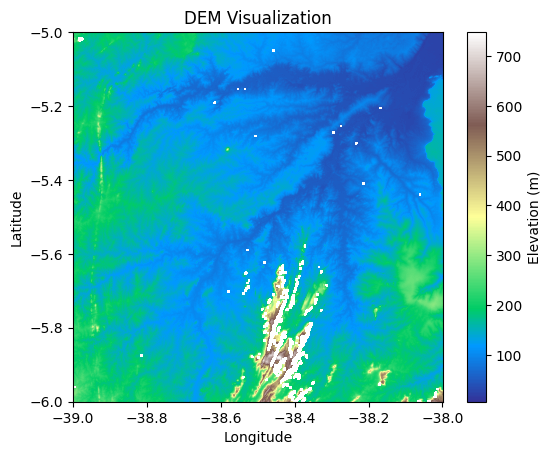

In [64]:
dem, transform = load_dem("s06_w039_1arc_v3.tif")

# Compute extent from transform
extent = [
    transform[2],                          # xmin (longitude)
    transform[2] + transform[0] * dem.shape[1],  # xmax
    transform[5] + transform[4] * dem.shape[0],  # ymin (latitude)
    transform[5]                          # ymax
]


# Plot with using lat/lon
fig, ax = plt.subplots()
img = ax.imshow(dem, cmap='terrain', extent=extent, origin='upper')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.colorbar(img, label='Elevation (m)')
plt.title('DEM Visualization')
plt.show()

In [66]:
# Check height min and max values
dem.min(), dem.max()

(6, 748)

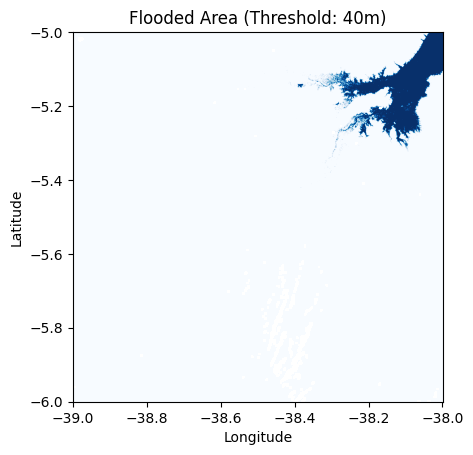

In [67]:
flood_threshold = 40  # meters
flood_mask = (dem <= flood_threshold).astype(int)

plt.imshow(flood_mask, extent=extent, cmap='Blues')
plt.title(f"Flooded Area (Threshold: {flood_threshold}m)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

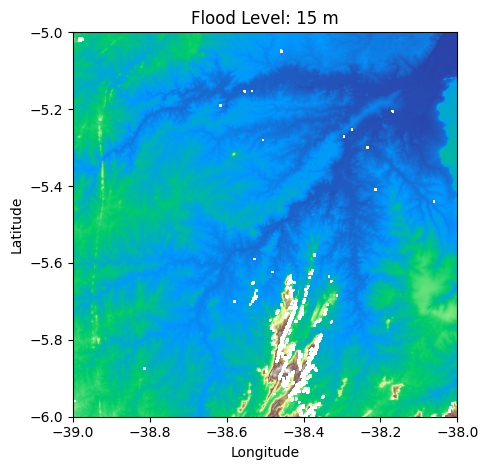

In [68]:
# Assume 'dem' is a 2D numpy array already loaded
# flood_levels defines how high the flood rises per frame
flood_levels = np.arange(15, 100, 5)

# Set up figure and axes
fig, ax = plt.subplots()
img = ax.imshow(dem, cmap='terrain', extent=extent, origin='upper')
flood_overlay = ax.imshow(np.zeros_like(dem), cmap='Blues', alpha=0.4, extent=extent, origin='upper')
title = ax.set_title("")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Animation function
def update(frame):
    level = flood_levels[frame]
    mask = np.where(dem <= level, 1, np.nan)
    flood_overlay.set_data(mask)
    title.set_text(f"Flood Level: {level} m")
    return flood_overlay, title

# Create animation
ani = FuncAnimation(fig, update, frames=len(flood_levels), interval=300, blit=True)
plt.tight_layout()
plt.show()

In [53]:
ani.save("flood_simulation4.gif", writer='pillow', fps=5)